In [24]:
import pandas as pd
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print(train_df.head(),"\n")
print(train_df.info(),"\n")
print(train_df.describe(),"\n")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   



In [25]:
print(test_df.head(),"\n")
print(test_df.info(),"\n")
print(test_df.describe(),"\n")

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----------

In [26]:
# Check the missing values
print(train_df.isnull().sum(),"\n")
print(test_df.isnull().sum(),"\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



In [27]:
# Handel Missing values Taitanic_train dataset
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
# Handel Missing values Taitanic_test dataset
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0], inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

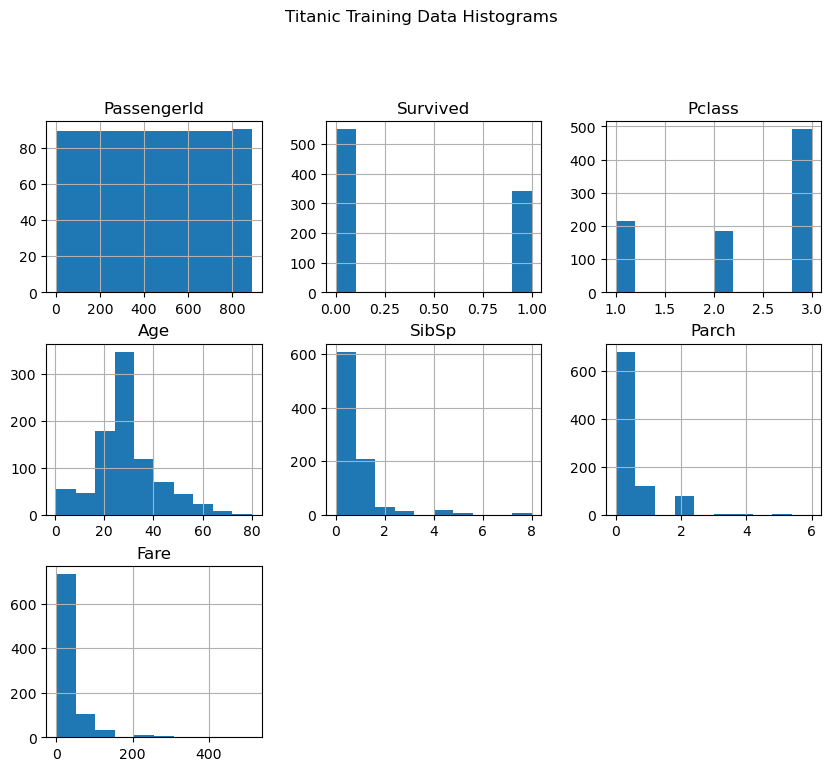

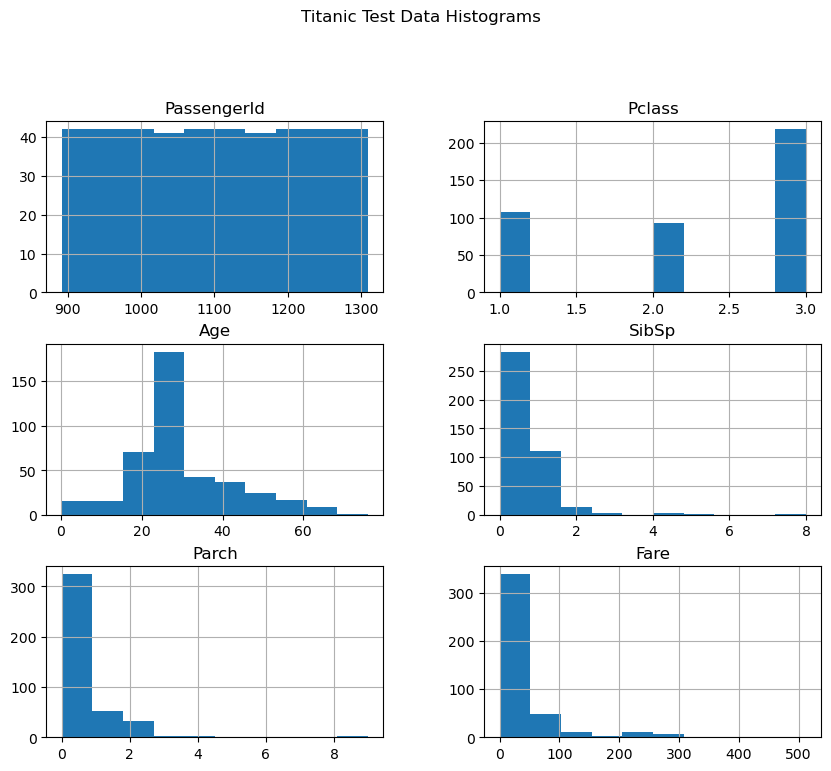

In [33]:
# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms Titanic Train
train_df.hist(figsize=(10, 8))
plt.suptitle('Titanic Training Data Histograms', y=1.02)
plt.show()

# Titanic Test
test_df.hist(figsize=(10, 8))
plt.suptitle('Titanic Test Data Histograms', y=1.02)
plt.show()

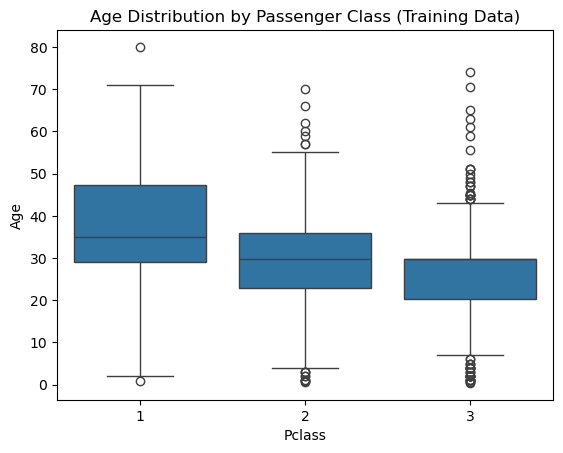

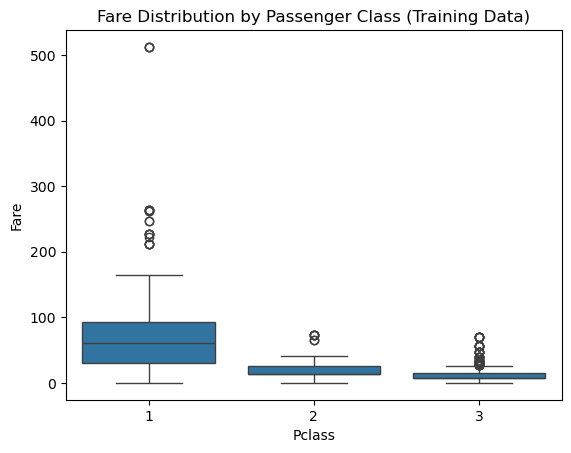

In [34]:
# Box plots Titanic Train
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age Distribution by Passenger Class (Training Data)')
plt.show()

# Titanic Test
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Passenger Class (Training Data)')
plt.show()


In [36]:
num_col = train_df.select_dtypes(include = ['float', 'int']).columns  # Numerical Variables

cat_col = train_df.select_dtypes(include = ['object']).columns # Categorical Variables

In [37]:
# Data Preprocessing
# Apply OneHotEncoder in Categorical Variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler
OHE = OneHotEncoder(handle_unknown='ignore')
dummy = OHE.fit_transform(train_df[cat_col]).toarray()
data_df = pd.DataFrame(dummy, columns=OHE.get_feature_names_out(cat_col))
df= train_df.drop(cat_col, axis=1)
train_df = pd.concat([df, data_df], axis=1)
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,26.000000,0,0,30.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
X = train_df.drop('Survived', axis=1)  # Servived Variables
y = train_df['Survived']   # target Variables

In [44]:
# Apply StandardScaler in numerical columns
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = SS.fit_transform(X)
X_SS = pd.DataFrame(X_SS, columns=X.columns)

In [48]:
# Split the data in X and Y parts (70 & 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SS, y, test_size=0.3, random_state=42)

In [50]:
#Apply Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [54]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7873134328358209
Precision: 0.8
Recall: 0.6486486486486487
F1-score: 0.7164179104477612


In [177]:
#!pip install lightgbm

In [56]:
# Sanitize the feature names
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Check the sanitized feature names
print(X_train.columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_AbbingMrAnthony', 'Name_AbbottMrRossmoreEdward',
       'Name_AbbottMrsStantonRosaHunt', 'Name_AbelsonMrSamuel',
       ...
       'Cabin_FG73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1730)


In [70]:
# Apply the LGBM Model

import lightgbm as lgb

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [71]:
# Apply the Metrics
accuracy_lgb = accuracy_score(y_test, lgb_pred)
precision_lgb = precision_score(y_test, lgb_pred)
recall_lgb = recall_score(y_test, lgb_pred)
f1_lgb = f1_score(y_test, lgb_pred)

print("LightGBM Accuracy:", accuracy_lgb)
print("LightGBM Precision:", precision_lgb)
print("LightGBM Recall:", recall_lgb)
print("LightGBM F1-score:", f1_lgb)

LightGBM Accuracy: 0.8097014925373134
LightGBM Precision: 0.8125
LightGBM Recall: 0.7027027027027027
LightGBM F1-score: 0.7536231884057971


In [72]:
# Apply the XGB Model
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [75]:
# XGBoost metrics
accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)

print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - F1-score:", f1_xgb)

XGBoost - Accuracy: 0.8022388059701493
XGBoost - Precision: 0.7959183673469388
XGBoost - Recall: 0.7027027027027027
XGBoost - F1-score: 0.7464114832535885


In [78]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Cross-validation for Decision Tree
dt_scores = cross_val_score(model, X_SS, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean CV Accuracy (Decision Tree):", dt_scores.mean())

# Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters (Decision Tree):", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

Decision Tree Cross-Validation Scores: [0.65921788 0.78651685 0.82022472 0.79775281 0.85393258]
Mean CV Accuracy (Decision Tree): 0.7835289686774213
Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}


In [79]:
# Hyperparameter tuning for LGBoost
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train, y_train)
print("Best Parameters (LightGBM):", lgb_grid_search.best_params_)
best_lgb_model = lgb_grid_search.best_estimator_

[LightGBM] [Info] Number of positive: 184, number of negative: 314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369478 -> initscore=-0.534457
[LightGBM] [Info] Start training from score -0.534457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
# Cross-validation for XGBoost
xgb_scores = cross_val_score(xgb_model, X_SS, y, cv=5)
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("Mean CV Accuracy (XGBoost):", xgb_scores.mean())

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)
print("Best Parameters (XGBoost):", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

XGBoost Cross-Validation Scores: [0.66480447 0.79213483 0.85955056 0.79775281 0.83707865]
Mean CV Accuracy (XGBoost): 0.7902642646412654


In [214]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
})

print(metrics_df)

      Model  Accuracy  Precision    Recall  F1-score
0  LightGBM  0.809701   0.812500  0.702703  0.753623
1   XGBoost  0.802239   0.795918  0.702703  0.746411


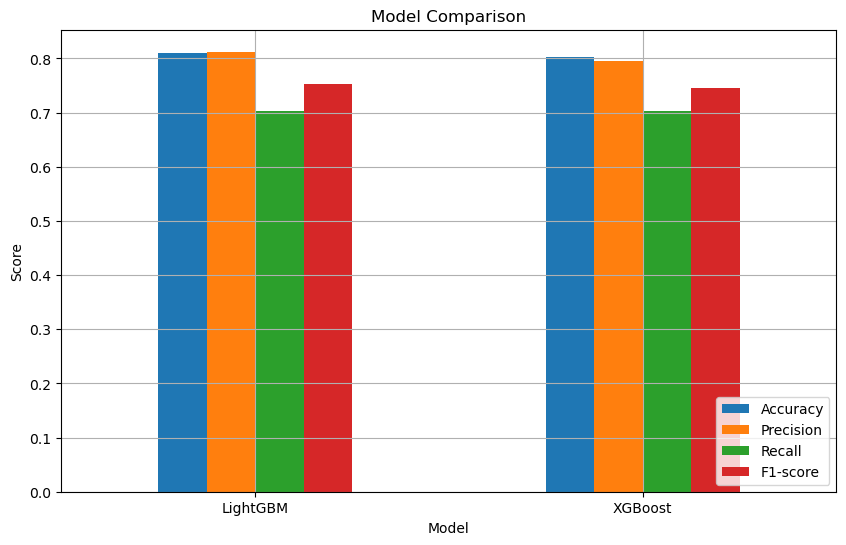

In [216]:
# Compare the model Using Visualization
# Bar plot for comparing model performance
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


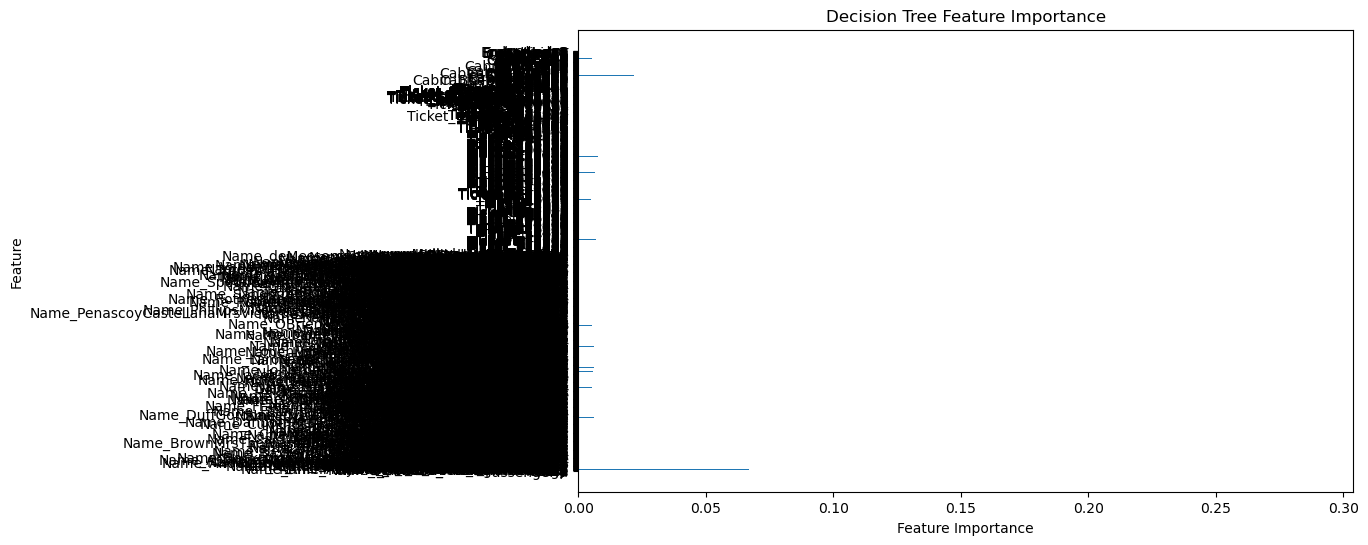

In [218]:
# Feature importance for Decision Tree
feature_importances_dt = best_dt_model.feature_importances_
feature_names_dt = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names_dt, feature_importances_dt)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

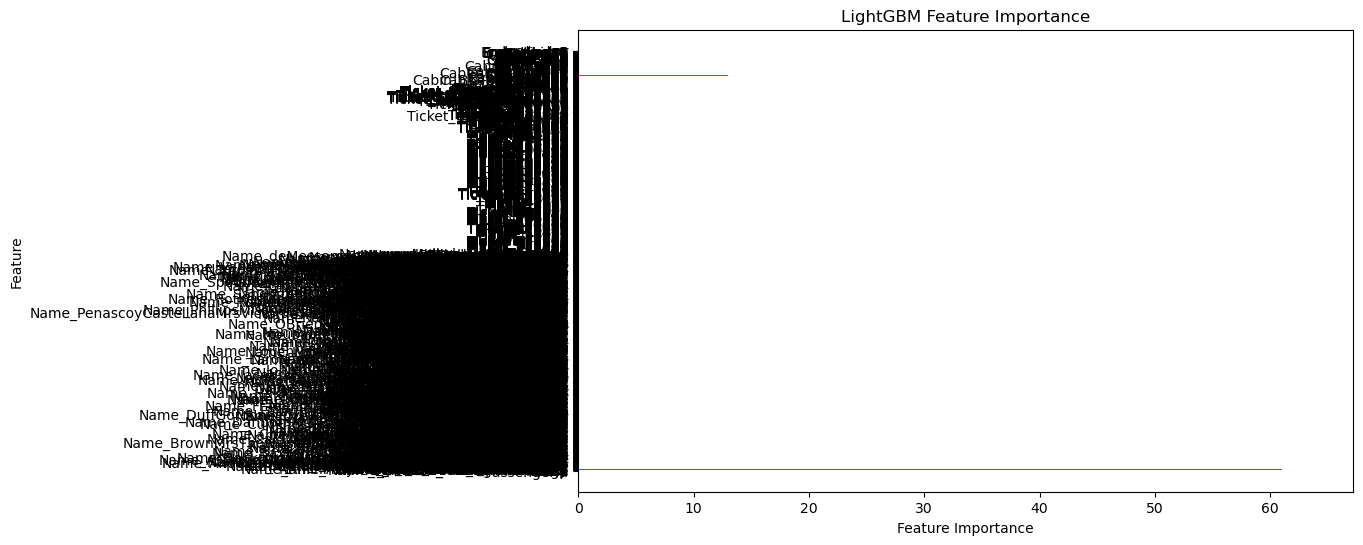

In [219]:
# Feature importance for LightGBM
feature_importances_lgb = best_lgb_model.feature_importances_
feature_names_lgb = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names_lgb, feature_importances_lgb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance')
plt.show()

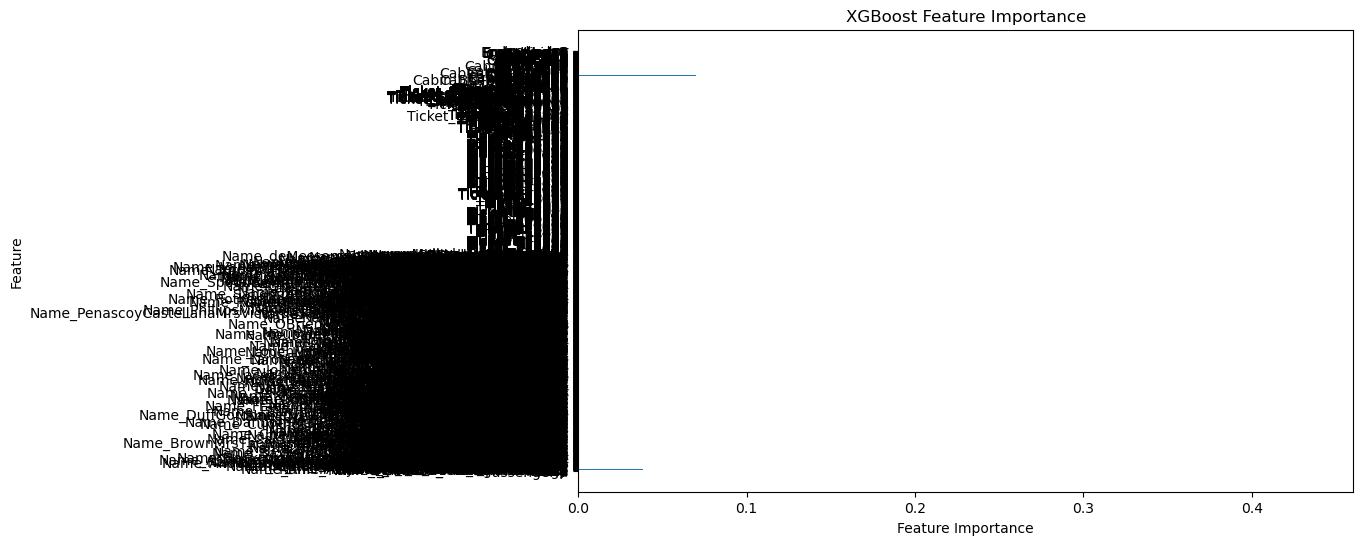

In [222]:
# Feature importance for XGBoost
feature_importances_xgb = best_xgb_model.feature_importances_
feature_names_xgb = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names_xgb, feature_importances_xgb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

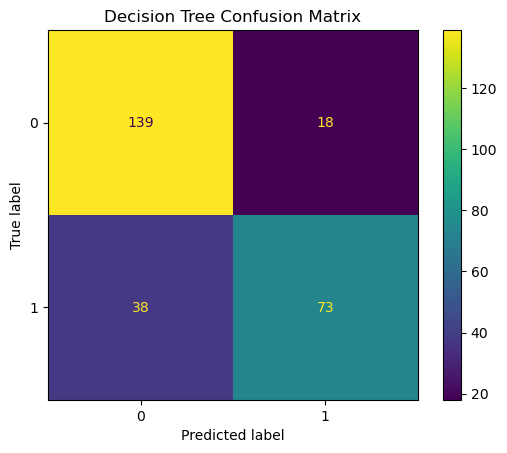

In [224]:
# Confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree
cm_dt = confusion_matrix(y_test, best_dt_model.predict(X_test))
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=best_dt_model.classes_)
disp_dt.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


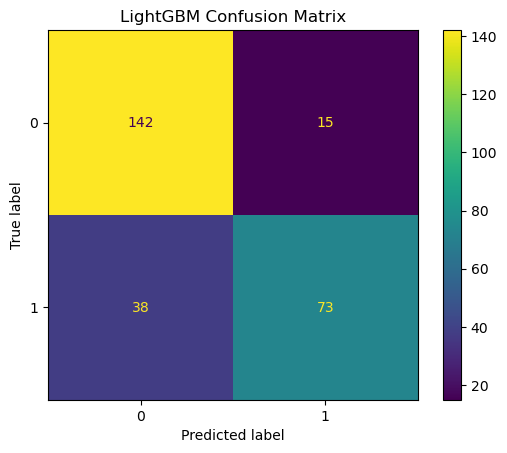

In [226]:
# LightGBM
cm_lgb = confusion_matrix(y_test, best_lgb_model.predict(X_test))
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=best_lgb_model.classes_)
disp_lgb.plot()
plt.title('LightGBM Confusion Matrix')
plt.show()

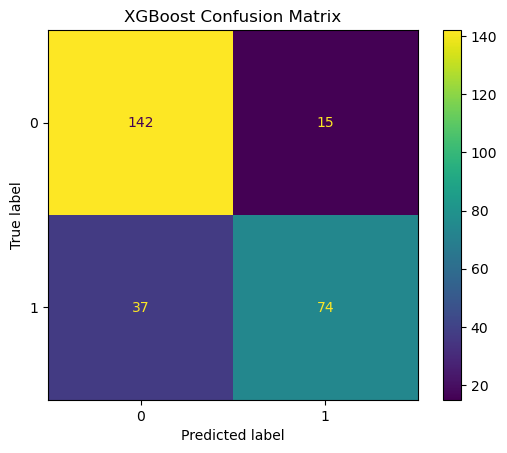

In [228]:
# XGBoost
cm_xgb = confusion_matrix(y_test, best_xgb_model.predict(X_test))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_xgb_model.classes_)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()